#### Задание исследовать функции:
1. f = -18 * x ** 3 + 5 * x ** 2 + 10 * x - 30
2. f = 2 * x ** 3 + 2 * x ** 2 - 18 * x - 18
3. f = (x ** 2 + 3) / (3 * (x + 1))

Исследуем 1ю функцию:
f = -18 * x ** 3 + 5 * x ** 2 + 10 * x - 30

In [21]:
from sympy import *
from sympy.plotting import plot
init_printing

<function sympy.interactive.printing.init_printing(pretty_print=True, order=None, use_unicode=None, use_latex=None, wrap_line=None, num_columns=None, no_global=False, ip=None, euler=False, forecolor=None, backcolor='Transparent', fontsize='10pt', latex_mode='plain', print_builtin=True, str_printer=None, pretty_printer=None, latex_printer=None, scale=1.0, **settings)>

In [22]:
x=Symbol('x')
f = -18 * x ** 3 + 5 * x ** 2 + 10 * x - 30
# a=plot(-18 * x ** 3 + 5 * x ** 2 + 10 * x - 30),(x,-1,10)

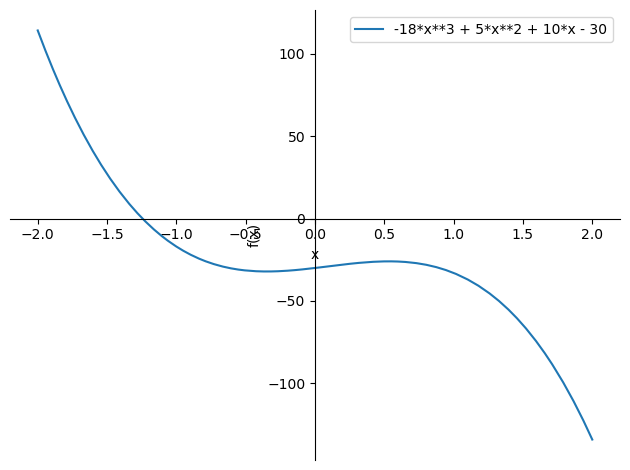

In [23]:
plot(f, (x, -2, 2), legend=True)

Область определения функции

In [41]:
Reals - singularities(f, x) 

Reals

Определим корни или нули функции

In [36]:
solveset(f,x,domain=S.Reals)

{-(5*sqrt(218931)/108 + 127045/5832)**(1/3)/3 - 565/(972*(5*sqrt(218931)/108 + 127045/5832)**(1/3)) + 5/54}

In [40]:
real_root(f,x)

Piecewise(((-18*x**3 + 5*x**2 + 10*x - 30)**(1/x), Eq(x, -1) | Eq(x, 1)), (Abs(18*x**3 - 5*x**2 - 10*x + 30)**(1/x)*sign(-18*x**3 + 5*x**2 + 10*x - 30), Eq(Mod(x, 2), 1) & Eq(-54*re(x)**2*im(x) + 10*re(x)*im(x) + 18*im(x)**3 + 10*im(x), 0)), ((-18*x**3 + 5*x**2 + 10*x - 30)**(1/x), True))

In [42]:
print(f'Точка пересечения с осью y (x=0) f={f.subs(x,0)}')

Точка пересечения с осью y (x=0) f=-30


In [44]:
k=limit(f/x,x,oo)
b=limit(f-k*x,x,oo)

print(f'k={k},b={b} ')
print('Ассимптот нет')

k=-oo,b=Limit(-18*x**3 + 5*x**2 + oo*x - 30, x, oo, dir='-') 
Ассимптот нет


Найдем интервалы, на которых функция возрастает и убывает

In [45]:
b= [-oo,oo]
b[1:1]=solve(diff(f),x)
sorted(b)

[-oo, 5/54 - sqrt(565)/54, 5/54 + sqrt(565)/54, oo]

In [26]:
f_diff = [-oo, oo]
f_diff[1:1] = solve(diff(f), x)

incr_list = []
decr_list = []

for i in range(1, len(f_diff)):
    val = is_decreasing(f, Interval.open(f_diff[i - 1], f_diff[i]))
    if val:
        decr_list.append(f"[{f_diff[i - 1]}, {f_diff[i]}]")
    else:
        incr_list.append(f"[{f_diff[i - 1]}, {f_diff[i]}]")
        
print(f"Возрастает на интервалах:", *incr_list, sep="\n")
print(f"Убывает на интервалах:", *decr_list, sep="\n")

Возрастает на интервалах:
[5/54 - sqrt(565)/54, 5/54 + sqrt(565)/54]
Убывает на интервалах:
[-oo, 5/54 - sqrt(565)/54]
[5/54 + sqrt(565)/54, oo]


Вычислим вершину (экстремумы функции)

In [46]:
#мой вариант
df=solve(diff(f),x)
b= [-oo,oo]
b[1:1]=solve(diff(f),x)
c=sorted(b)
# print(df)
# print(c)
for j in df:
    for i in range(1, len(f_diff)-1):
        if i==c.index(j):
            val1 = is_increasing(f, Interval.open(c[i - 1], c[i]))
            val2 = is_decreasing(f, Interval.open(c[i], c[i+1]))
#             print(j,i,val1,val2)
            if val1==val2==True:
                print(f"Точка локального максимума: x: {j}, y: {f.subs(x,j)}")
            elif val1==val2==False:
                print(f"Точка локального минимума: x: {j}, y: {f.subs(x,j)}")
            else:
                print(f"непонятно: x: {j}, y: {f.subs(x,j)}")

Точка локального минимума: x: 5/54 - sqrt(565)/54, y: -785/27 - 5*sqrt(565)/27 + 5*(5/54 - sqrt(565)/54)**2 - 18*(5/54 - sqrt(565)/54)**3
Точка локального максимума: x: 5/54 + sqrt(565)/54, y: -785/27 - 18*(5/54 + sqrt(565)/54)**3 + 5*(5/54 + sqrt(565)/54)**2 + 5*sqrt(565)/27


3. Определим промежутки знакопостоянства функции

In [56]:
m= [-oo,oo]
pos_list=[]
neg_list=[]
m[1:1]=solveset(f,x,domain=S.Reals)

if is_decreasing(f, Interval.open(m[0],m[1]))==True:
    pos_list.append(f"[{m[0]},{m[1]}]")
    for i in range(2,len(m),2):
        neg_list.append(f"[{m[i-1]},{m[i]}]")
    for i in range(3,len(m),2):
        pos_list.append(f"[{m[i-1]},{m[i]}]")
else:
    neg_list.append(f"[{m[0]},{m[1]}]")
    for i in range(2,len(m),2):
        pos_list.append(f"[{m[i-1]},{m[i]}]")
    for i in range(3,len(m),2):
        neg_list.append(f"[{m[i-1]},{m[i]}]")
print(f'f=0: {solveset(f,x,domain=S.Reals)}')
print("f > 0:", *pos_list, sep="\n")
print("f < 0:", *neg_list, sep="\n")

f=0: {-(5*sqrt(218931)/108 + 127045/5832)**(1/3)/3 - 565/(972*(5*sqrt(218931)/108 + 127045/5832)**(1/3)) + 5/54}
f > 0:
[-oo,-(5*sqrt(218931)/108 + 127045/5832)**(1/3)/3 - 565/(972*(5*sqrt(218931)/108 + 127045/5832)**(1/3)) + 5/54]
f < 0:
[-(5*sqrt(218931)/108 + 127045/5832)**(1/3)/3 - 565/(972*(5*sqrt(218931)/108 + 127045/5832)**(1/3)) + 5/54,oo]
